In [22]:
import pandas as pd
import os
import mimetypes
import matplotlib.pyplot as plt

# Ajustar el tamaño de la gráfica
plt.figure(figsize=(10, 6))


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [23]:
#Metodo para contar el número de archivos en una carpeta y sus subcarpetas
def contar_archivos_y_tipos(carpeta):
    total_archivos = 0
    tipos_archivos = {}

    for ruta_actual, carpetas, archivos in os.walk(carpeta):
        for archivo in archivos:
            total_archivos += 1
            ruta_completa = os.path.join(ruta_actual, archivo)
            tipo_archivo, _ = mimetypes.guess_type(ruta_completa)
            tipo_archivo = tipo_archivo or 'Tipo desconocido'

            if tipo_archivo in tipos_archivos:
                tipos_archivos[tipo_archivo] += 1
            else:
                tipos_archivos[tipo_archivo] = 1

    return total_archivos, tipos_archivos

In [24]:
#Metodo para contar el número de archivos por carpeta
def contar_archivos_por_carpeta(carpeta):
    archivos_por_carpeta = {}

    archivos_por_carpeta = {}

    for ruta_actual, carpetas, archivos in os.walk(carpeta):
        nombre_carpeta = os.path.basename(ruta_actual)
        archivos_por_carpeta[nombre_carpeta] = len(archivos)

    return archivos_por_carpeta


In [25]:
carpeta_inicio = r'C:\Users\lacer\OneDrive\Escritorio\ejercicios\TFM'  #Escribir aquí ubicación de la carpeta de imagenes
total, tipos = contar_archivos_y_tipos(carpeta_inicio)

print("Total de archivos:", total)
print("Tipos de archivos:")

for tipo, cantidad in tipos.items():
    print(f"- {tipo}: {cantidad}")


Total de archivos: 277525
Tipos de archivos:
- application/x-zip-compressed: 1
- image/png: 277524


In [26]:
#Método para obtener el número de imagenes por subcarpeta "0" y "1"
def generar_dataset(carpeta_raiz):
    dataset = []

    for ruta_actual, carpetas, archivos in os.walk(carpeta_raiz):
        nombre_carpeta = os.path.basename(ruta_actual)
        archivos_subcarpeta_0 = 0
        archivos_subcarpeta_1 = 0

        subcarpeta_0 = os.path.join(ruta_actual, "0")
        if os.path.exists(subcarpeta_0) and os.path.isdir(subcarpeta_0):
            archivos_subcarpeta_0 = len(os.listdir(subcarpeta_0))

        subcarpeta_1 = os.path.join(ruta_actual, "1")
        if os.path.exists(subcarpeta_1) and os.path.isdir(subcarpeta_1):
            archivos_subcarpeta_1 = len(os.listdir(subcarpeta_1))

        if nombre_carpeta != os.path.basename(carpeta_raiz) and nombre_carpeta != "0" and nombre_carpeta != "1":
            dataset.append((nombre_carpeta, archivos_subcarpeta_0, archivos_subcarpeta_1))

    return dataset

In [27]:
dataset = generar_dataset(carpeta_inicio)

# Convertir el dataset en un DataFrame
df = pd.DataFrame(dataset, columns=["Id_paciente", "Benignas", "Cancerigenas"])

print(df)

    Id_paciente  Benignas  Cancerigenas
0         10253       479            70
1         10254       772            76
2         10255       181            91
3         10256       351           117
4         10257       427           208
..          ...       ...           ...
274        9346       634           727
275        9347       359            51
276        9381      1198           128
277        9382      1306           346
278        9383       494            70

[279 rows x 3 columns]


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id_paciente   279 non-null    object
 1   Benignas      279 non-null    int64 
 2   Cancerigenas  279 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


In [29]:
total_benig=df["Benignas"].sum()
total_cancer=df["Cancerigenas"].sum()
print("Total de imagenes de celulas benignas: "+ str(total_benig))
print("Total de imagenes de celulas cancerígenas: "+ str(total_cancer))

Total de imagenes de celulas benignas: 198738
Total de imagenes de celulas cancerígenas: 78786


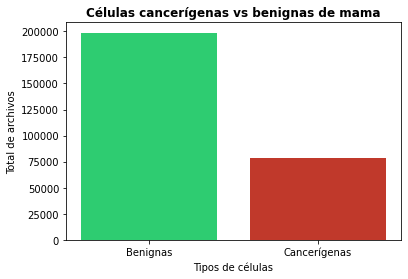

In [34]:
# Etiquetas de las barras
labels = ['Benignas', 'Cancerígenas']

# Alturas de las barras
heights = [total_benig, total_cancer]

# Colores de las barras
colors = ['#2ecc71', '#c0392b']  # Verde para benigno, rojo para cáncer

# Crear el gráfico de barras
plt.bar(labels, heights, color=colors)

# Configurar el estilo del título en negrita
title_font = {'fontweight': 'bold'}

# Título y etiquetas de los ejes
plt.title('Células cancerígenas vs benignas de mama', **title_font)
plt.xlabel('Tipos de células')
plt.ylabel('Total de archivos')

# Mostrar el gráfico
plt.show()

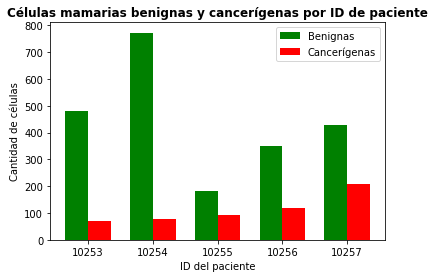

In [39]:
# Obtener los datos de cada columna
ids = df['Id_paciente'][:5]
benignas = df['Benignas'][:5]
cancerigenas = df['Cancerigenas'][:5]

# Configurar el ancho de las barras
bar_width = 0.35

# Posición de las barras
pos = range(len(ids))

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Dibujar las barras de células benignas
ax.bar(pos, benignas, bar_width, label='Benignas', color='green')

# Dibujar las barras de células cancerígenas
ax.bar([p + bar_width for p in pos], cancerigenas, bar_width, label='Cancerígenas', color='red')

# Configurar los ticks del eje x con los IDs de los pacientes
ax.set_xticks([p + bar_width/2 for p in pos])
ax.set_xticklabels(ids)

# Configurar el estilo del título en negrita
title_font = {'fontweight': 'bold'}

# Etiquetas de los ejes y título
plt.xlabel('ID del paciente')
plt.ylabel('Cantidad de células')
plt.title('Células mamarias benignas y cancerígenas por ID de paciente', **title_font)

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()